# 4.0 Introducción a la clase Scene

## Clase Scene
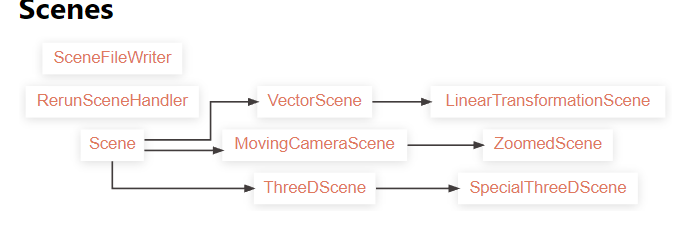

En términos concretos la clase Scene, es la clase en la que los códigos de  las animaciones de Manim se basan, además que esta nos provee de todas las herramientas necesarias para la construcción de las animaciones.
En nuestra escena existirán varios elementos que todos se engloban en un solo grupo llamados Mobjects.
Un Mobject a grandes rasgos solo es un objeto mostrado en nuestra pantalla.
Todos los Mobjetcs pueden ser mostrados o desaparecidos gracias a los métodos que hay en la clase Scene que son: **Scene.add() y Scene.remove()** .
El método que nos permite animar es: **Scene.play()**.
Pero hay otro método que siempre se anula al escribir nuestro código que se llama **Scene.construct()**.


## Mobjects
Como ya lo mencionamos los mobjects son elementos que son animados para una escena y como podemos observar que pueden ser objetos matemáticos u objetos que sean solo textos y cada uno de estos tienen sus respectivos métodos, atributos para poder modificar sus características predeterminadas. 

### VMobjects

Es un subclase de los Mobjects, solo que estos objetos son en su mayoría objetos matemáticos (vectores), pero también son de ayuda para crear objetos que no sean matemáticos como veremos el caso de los Text(No Latex) que provienen de los VMobjects

 ![Mobject](Mobject.png)





### El método next_section
Como mencionamos ya anteriormente la clase Scene tiene una muchos métodos con los cuales es posible hacer toda la parte animada de nuestro código, pero este metodo permite separar las animaciones para renderizarlas por separado.


**next_section(name='unnamed', type=DefaultSectionType.NORMAL, skip_animations=False)**

In [ ]:
class MyScene(Scene):
    def construct(self):
        self.play(Write(Text("Hello World!")

In [ ]:
def construct(self):
    # play the first animations...
    # you don't need a section in the very beginning as it gets created automatically
    self.next_section()
    # play more animations...
    self.next_section("this is an optional name that doesn't have to be unique")
    # play even more animations...
    self.next_section("this is a section without any animations, it will be removed")

In [2]:
def construct(self):
    self.next_section()
    # this section doesn't have any animations and will be removed
    # but no error will be thrown
    # feel free to tend your flock of empty sections if you so desire
    self.add(Circle())
    self.next_section()

## Text
Cuando queremos escribir textos en nuestras animaciones, tenemos dos formas de hacerlo que es con los Mobjects Text o con ayuda de Latex que más adelante diremos como ocupar esta opción

Cuando ocupamos la opción Text, estamos ocupando las librerias de **Pango** 
La ventaja de ocupar este opción es que esta totalmente dedicada a textos y no tanto a poner textos matematicos que es lo que nos ofrece Latex. Otra ventaja con Latex es que no es necesario meter otras librerias para querer escribir textos en otros idiomas, además del ingles.
Como en los siguientes ejemplos


In [ ]:
class Example1Text(Scene):
    def construct(self):
        text = Text('Hello world').scale(3)
        self.add(text)

### Color

In [ ]:
class TextColorExample(Scene):
    def construct(self):
        text1 = Text('Hello Mundo', color=BLUE).scale(3)
        text2 = Text('Hola world', gradient=(BLUE, GREEN)).scale(3).next_to(text1, DOWN)
        self.add(text1, text2) 

### Tipos de Letra, más colores y grosores de letra

In [ ]:
class TextItalicAndBoldExample(Scene):
    def construct(self):
        text1 = Text("Hello Luis", slant=ITALIC)
        text2 = Text("Hello world", t2s={'world':ITALIC})
        text3 = Text("Hello Juan", weight=BOLD)
        text4 = Text("Hello world", t2w={'world':BOLD})
        text5 = Text("Hello Diego", t2c={'o':YELLOW}, disable_ligatures=True)
        text6 = Text(
            "Visit us at docs.manim.community",
            t2c={"docs.manim.community": YELLOW},
            disable_ligatures=True,
       )
        text6.scale(1.3).shift(DOWN)
        self.add(text1, text2, text3, text4, text5 , text6)
        Group(*self.mobjects).arrange(DOWN, buff=.8).set_height(config.frame_height-LARGE_BUFF)       

### Renderizado 

In [ ]:
from manim import* 

class TextRender(Scene):
    def construct(self):
        morning = Text("Hola Animathica", font="sans-serif")
        self.play(Write(morning))
        self.wait(2)       

## MathTex y Tex 
Estos dos comandos tienen la particularidad, de que los textos tanto matemáticos como los que no son ahora son renderizados y creados por Latex, eso quiere decir que toda la sintaxis que trabajamos en Latex, es válida para escribir lo que necesitemos dentro de ambos comandos 
Tex("") y MathTex("") veamos unos ejemplos donde podamos ver cual es la caracteristica que tiene cada uno.
Además gracias a los comandos que tiene Latex, podemos ocupar un Tex cuando querramos escribir un texto matemático para nuestras animaciones y que no nos salte un error al compilar nuestro código


Aquí podemos ver dos ejemplos de como se usa Tex y MathTex

In [ ]:
from manim import*

class Tex(Scene):
     def construct(self):
        t1 = Tex('Hola Andrea')
        self.add((t1)
        

In [ ]:
from manim import*

class Eq(Scene):
    def construct(self):
        t = MathTex(r"\int_a^b f'(x) dx = f(b)- f(a)")
        t2 = MathTex(r"a^2+b^2=c^2")
        self.add(t)
        t2.next_to(t, DOWN)
        self.add(t2)

Aquí veamos un ejemplo de lo que mencionamos de poder utilizar sin problema Tex sin tener un problema de compilación

In [ ]:
from manim import* 


class Diferencia(Scene):
    def construct(self):
        arrow0 = MathTex(r"\xrightarrow{x^6y^8}", font_size=96)
        arrow1 = Tex(r"$\xrightarrow{x^6y^8}$", font_size=96)

        self.add(VGroup(arrow0, arrow1).arrange(DOWN))


Otro aspecto importante de los Tex, es que podemos usarlos como si tuvieramos una cadena de Python y ocupar de manera independiente cada elemento de esa cadena para darle color o agregarle alguna característica que queramos.


In [ ]:
from manim import *

class Strings(Scene):
    def construct(self):
        tex = Tex('Hola', r'$\bigstar$', r'\LaTeX', font_size=144)
        tex.set_color_by_tex('igsta', BLUE)
        self.add(tex)

Cuando trabajamos con los MathTex,  muchas veces las ecuaciones se escriben sin estar alineadas, una forma como lo haríamos en Latex, sería con el ambiente {aligned}, pero muchas veces nos saltará un error al compilarlo para nuestras animaciones, así que las últimas versiones de ManimCE han incorporado una opción para alinear los textos y en especial las ecuaciones, que es agregando dentro del MathTex un **r''** como en el siguiente ejemplo.

In [ ]:
class LaTeXAlignEnvironment(Scene):
    def construct(self):
        tex = MathTex(r'f(x) &= 3 + 2 + 1\\ &= 5 + 1 \\ &= 6', font_size=96)
        self.add(tex)

Propiedades no menos importantes que tienen los MathTex y que facilitan el trabajo.

In [ ]:
from manim import *

class LaTeXSubstringColoring(Scene):
    def construct(self):
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots",
            substrings_to_isolate="x"
        )
        equation.set_color_by_tex("x", YELLOW)
        self.add(equation)

In [ ]:
from manim import *

class IndexLabelsMathTex(Scene):
    def construct(self):
        text = MathTex(r"\binom{2n}{n+2}", font_size=96)

        # index the first (and only) term of the MathTex mob
        self.add(index_labels(text[0]))

        text[0][1:3].set_color(YELLOW)
        text[0][3:6].set_color(RED)
        self.add(text)

## SVGPathMobject

![SVP](sjj.png)
Varios tipos de VMobject que se ocupa muy regularmente en los videos provienen de esta subfamilia de VMobject (SVGPathMobject) que en teoría en esta familia son todos aquellos VMobjects  que realizan un cierto camino o que se construyen a partir de realizar un camino.
![SS](ss.png)
### Brace
Un VMobject que se desprende es el Brace, que forma un corchete entre dos o más Mobjects "englobandolos en un conjunto".

In [ ]:
from manim import *

class BraceExample(Scene):
    def construct(self):
        s = Square()
        self.add(s)
        for i in np.linspace(0.1,1.0,4):
            br = Brace(s, sharpness=i)
            t = Text(f"sharpness= {i}").next_to(br, RIGHT)
            self.add(t)
            self.add(br)
        VGroup(*self.mobjects).arrange(DOWN, buff=0.2)
        


## BraceBetweenPoints
Por último un Mobject que se desprende del Mobject Brace, la diferencia entre ambos es que en vez de englobar dos Mobjects como lo hace el Brace; este lo que hace es englobarte a partir de dos puntos dados y además este BraceBetweenPoints puedes al igual que el Brace darle una dirección, ya que hereda casi todos los atributos que le puedes dar a Brace

In [ ]:
from manim import *

class BraceBPExample(Scene):
    def construct(self):
        p1 = [0,0,0]
        p2 = [1,2,0]
        brace = BraceBetweenPoints(p1,p2)
        self.play(Create(NumberPlane()))
        self.play(Create(brace))
        self.wait(2)